In [1]:
import mapper
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import sklearn.metrics

Using cmappertools v1.0.24.


In [2]:
%matplotlib inline

In [4]:
import pickle
data = pickle.load( open( "all_data_conv2_1.p", "rb" ) )

In [11]:
data[0].shape

(16384, 128)

In [9]:
#Step 1: Input
#example data stored in '/home/a/.local/lib/python2.7/site-packages/mapper/exampleshapes/'
#import gzip
#filename = '/home/a/.local/lib/python2.7/site-packages/mapper/exampleshapes/cat-reference.csv.gz'
#with gzip.open(filename, 'r') as inputfile:
#    data = np.loadtxt(inputfile, delimiter=',', dtype=np.float)
# Preprocessing
point_labels = None
mask = None
Gauss_density = mapper.filters.Gauss_density
kNN_distance  = mapper.filters.kNN_distance
crop = mapper.crop
# Custom preprocessing code

# End custom preprocessing code
data, point_labels = mapper.mask_data(data, mask, point_labels)

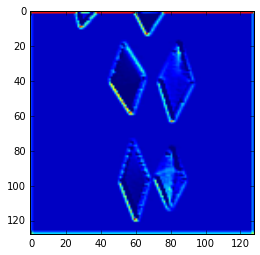

In [17]:
plt.imshow(np.reshape(np.asarray(data[0][:,1]),[128,128]))

In [20]:
#Step 2: Metric
intrinsic_metric = False
if intrinsic_metric:
    is_vector_data = data.ndim != 1
    if is_vector_data:
        metric = Euclidean
        if metric != 'Euclidean':
            raise ValueError('Not implemented')
    data = mapper.metric.intrinsic_metric(data[0], k=1, eps=1.0)
is_vector_data = data[0].ndim != 1

In [23]:
data[0].shape

(16384, 128)

In [24]:
#Step 3: Filter function
if is_vector_data:
    metricpar = {'metric': 'euclidean'}
    f1 = mapper.filters.eccentricity(data[0],
        metricpar=metricpar,
        exponent=np.inf)
else:
    f1 = mapper.filters.eccentricity(data[0],
        exponent=np.inf)
# Filter transformation
mask = None
crop = mapper.crop
# Custom filter transformation

# End custom filter transformation

In [25]:
#Step 4: Mapper parameters
cover = mapper.cover.cube_cover_primitive(intervals=15, overlap=50.0)
cluster = mapper.single_linkage()
if not is_vector_data:
    metricpar = {}
mapper_output = mapper.mapper(data[0], f1,
    cover=cover,
    cluster=cluster,
    point_labels=point_labels,
    cutoff=None,
    metricpar=metricpar)
cutoff = mapper.cutoff.first_gap(gap=0.1)
mapper_output.cutoff(cutoff, f1, cover=cover, simple=False)

Number of CPU cores present: 4
Start Mapper thread.
Start Mapper thread.
Start Mapper thread.
Start Mapper thread.
Mapper: Filter range in dimension 0: [19.00, 28.73]
Mapper: Cover: Hypercube cover. Intervals: (15,). Overlap: (50.0,)
Mapper: Clustering: Single linkage clustering
Mapper: Cutoff: None
Level: (0,)
Level: (1,)
Level: (2,)
Level: (3,)
Level: (4,)
Level: (5,)
Level: (6,)
Level: (7,)
Filter level (0,) has 8 points.
Filter level (1,) has 42 points.
Level: (8,)Filter level (2,) has 258 points.

Level: (9,)
Level: (10,)
Level: (11,)
Level: (12,)
Level: (13,)
Level: (14,)
Filter level (5,) has 836 points.
Filter level (3,) has 14068 points.
Filter level (4,) has 14297 points.
Filter level (6,) has 541 points.
Filter level (7,) has 472 points.
Filter level (8,) has 591 points.
Filter level (9,) has 410 points.
Filter level (10,) has 264 points.
Filter level (11,) has 466 points.
Filter level (12,) has 379 points.
Filter level (13,) has 82 points.
Filter level (14,) has 46 points.


Draw nodes and dendrograms.
Done.


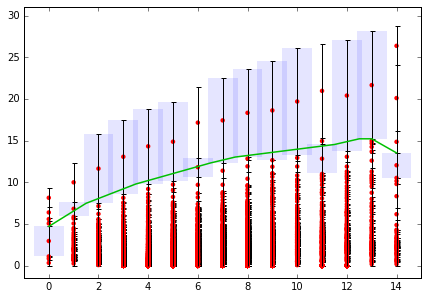

In [26]:
mapper_output.draw_scale_graph()
plt.savefig('scale_graph.pdf')

/home/a/.local/lib/python2.7/site-packages/mapper/draw_mapper_output.py:293: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if node_labels != 'empty':


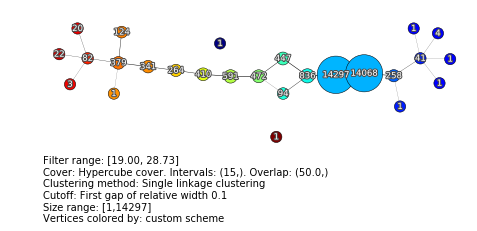

In [27]:
#Step 5: Display parameters
# Node coloring
nodes = mapper_output.nodes
node_color = None
point_color = f1
name = 'custom scheme'
# Custom node coloring

# End custom node coloring
node_color = mapper_output.postprocess_node_color(node_color, point_color, point_labels)
minsizes = []
mapper_output.draw_2D(minsizes=minsizes,
    node_color=node_color,
    node_color_scheme=name)
plt.savefig('mapper_output.png')

In [14]:
matrix = np.zeros([f1.shape[0],mapper_output.num_nodes])

In [15]:
mapper_output.num_nodes

93

In [16]:
matrix.shape

(4096, 93)

KeyboardInterrupt: 

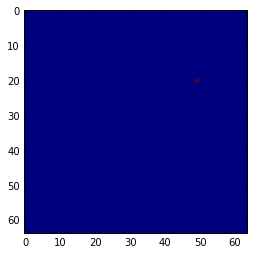

In [19]:
for i in range(mapper_output.num_nodes):
    matrix[mapper_output.nodes[i].points,i] = f1[mapper_output.nodes[i].points]
    plt.imshow(np.reshape(matrix[:,i],[64,64]),vmax = max(f1),vmin = min(f1))
    plt.savefig(str(i)+'.png')

In [18]:
max(f1)

60.670434650357379

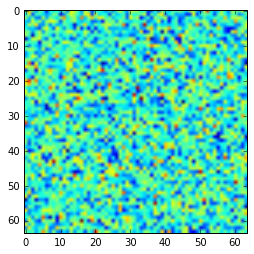

In [30]:
plt.imshow(np.reshape(f0,[64,64]))

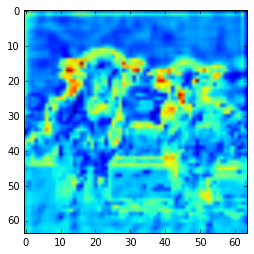

In [20]:
plt.imshow(np.reshape(f1,[64,64]))

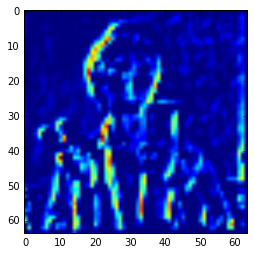

In [32]:
plt.imshow(np.reshape(data[:,0],[64,64]))

In [33]:
max_values = np.zeros(matrix.shape[1])
nodes = np.zeros(matrix.shape[1])

In [42]:
for i in range(matrix.shape[1]):
    max_values[i] = np.mean(f1[mapper_output.nodes[i].points])
    nodes[i] = np.shape(mapper_output.nodes[i].points)[0]

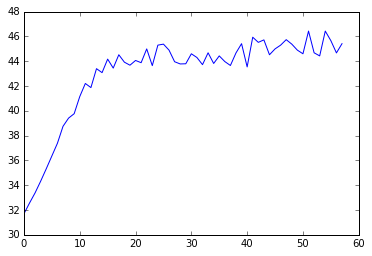

In [43]:
plt.plot(max_values)

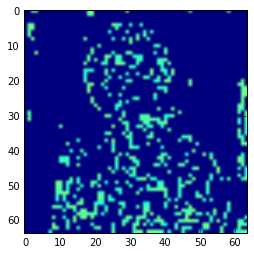

In [49]:
plt.imshow(np.reshape(matrix[:,6],[64,64]),vmax = max(f1),vmin = min(f1))

In [37]:
backgroung = np.zeros(matrix.shape[0])

In [22]:
backgroung.shape

(4096,)

In [36]:
objects = np.zeros(matrix.shape[0])

In [24]:
backgroung

array([ 0.,  0.,  0., ...,  0.,  0.,  0.])

In [25]:
objects

array([ 0.,  0.,  0., ...,  0.,  0.,  0.])

In [38]:
for i in range(mapper_output.num_nodes):
    if i > 5:
        objects = objects + matrix[:,i]
    else:
        backgroung = backgroung + matrix[:,i]

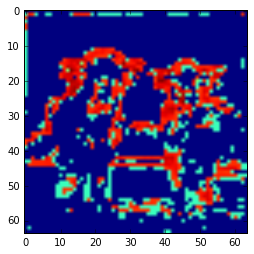

In [39]:
plt.imshow(np.reshape(objects,[64,64]))
plt.savefig('object.png')

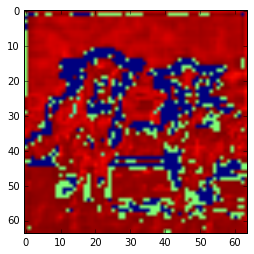

In [40]:
plt.imshow(np.reshape(backgroung,[64,64]))
plt.savefig('backgroung.png')